In [193]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [194]:
# Import the NumPy and Pandas libraries

import numpy as np
import pandas as pd
import seaborn as sns

In [195]:
#save the dataset as leads

leads=pd.read_csv(r'Leads.csv')

In [196]:
# Check the head of the dataset

leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

Inspect the various aspects of the dataframe

In [197]:
# Inspect the shape of the dataset

leads.shape

(9240, 37)

In [198]:
# Check the info to see the types of the feature variables and the null values present

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are null values present in some columns in the dataset

In [199]:
# Check the summary of the dataset

leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Data Cleaning and Preparation

In [200]:
# Check the number of missing values in each column

missing_values = leads.isna().sum().sort_values(ascending=False)
print(missing_values)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

There are lot of columns having missing columns, as there are 9240 entries in the dataframe. Let's continue with the columns having less than or equal 3000 mising values as they are good enough to use

In [201]:
# Remove the columns in which missing values are greater than 3000 and continue with rest

#missing values threshold
threshold = 3000

columns_to_keep = leads.columns[leads.isna().sum() <= threshold]
leads = leads[columns_to_keep]

In [202]:
# Check the number of missing values again

missing_values = leads.isna().sum().sort_values(ascending=False)
print(missing_values)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

As X education sells online courses, it seems `City` and `Country` columns seems relevant to drop and also due to brevity purpose this action is implemented

In [203]:
leads.drop(['City','Country'],axis=1,inplace=True)

Also the columns `Prospect ID` and `Lead Number` won't be useful in the analysis, so it's better to drop these two.

In [204]:
# Drop columns Prospect ID and Lead Number

leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [205]:
#checking the columns after dropping

leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [206]:
#Check the missing values percentage of all columns

missing_percentages = (leads.isna().sum() / leads.shape[0]) * 100
print(missing_percentages)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [207]:
# Check the number of missing values again

missing_values = leads.isna().sum().sort_values(ascending=False)
print(missing_values)

Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Lead Origin                                         0
Digital Advertisement                               0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations                             0
Search                                              0
Newspaper                   

The categorical columns have a level called "Select" which is collected as when a lead not chooses any option for that specific column which is as good as null value

In [208]:
#Check the value counts of the categorical columns for any abnormalities

def is_categorical(col):
  return col.dtype == 'category' or col.dtype == 'object'

for col in leads.columns:
  if is_categorical(leads[col]):
    print(f"Column: {col}")
    print(leads[col].value_counts())
    print("___________________________________________________")

Column: Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
___________________________________________________
Column: Lead Source
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
___________________________________________________
Column: Do Not Email
Do Not Email
No     8506
Yes     734
Name: count, dty

The `Lead Profile` and `How did you hear about X Education` columns have a lot of data inclined to `Select` level which is no benefit to the analysis. So it's best to drop them.

In [209]:
# Drop the above mentioned columns

leads.drop(['Lead Profile','How did you hear about X Education'],axis=1,inplace=True)

Also the in the above value counts of the columns, it is evident some columns have `No` values with major data inclined to it. Those are `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content` and `I agree to pay the amount through cheque`. So, it is better to drop them as it won't be helpful for the analysis

In [210]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1,inplace=True)

And the column `What matters most to you in choosing a course` has `Better Career Prospects`  level `6528` times and the other 2 levels have 2 and 1 counts which is insignificant and it is not useful for the model. So, it is better to drop it

In [211]:
leads.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

In [212]:
# Check the number of missing values again

missing_values = leads.isna().sum().sort_values(ascending=False)
print(missing_values)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64


Still, there is a column `What is your current occupation` with lot of missing values. Since many columns have been removed already, instead of dropping the column. Let's drop the null rows for the column

In [213]:
leads = leads.dropna(subset=['What is your current occupation'])

In [214]:
# Check the number of missing values again

missing_values = leads.isna().sum().sort_values(ascending=False)
print(missing_values)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64


Now only some columns have few missing values, we can simply drop the missing value rows of those columns


In [215]:
cols_rows_to_drop= ['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source', 'Specialization']

leads = leads.dropna(subset=cols_rows_to_drop)

In [216]:
# Check the number of missing values again

missing_values = leads.isna().sum().sort_values(ascending=False)
print(missing_values)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64


Now the data don't have any missing values. Let's check the percentage of retained rows

In [217]:
print(len(leads.index))
print(len(leads.index)/9240*100)

6373
68.97186147186147


Approximately 69% of the rows are retained which is good enough to proceed further.

In [218]:
# Let's check the dataset again

leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [219]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [220]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   object 
 

# Univariate Analysis

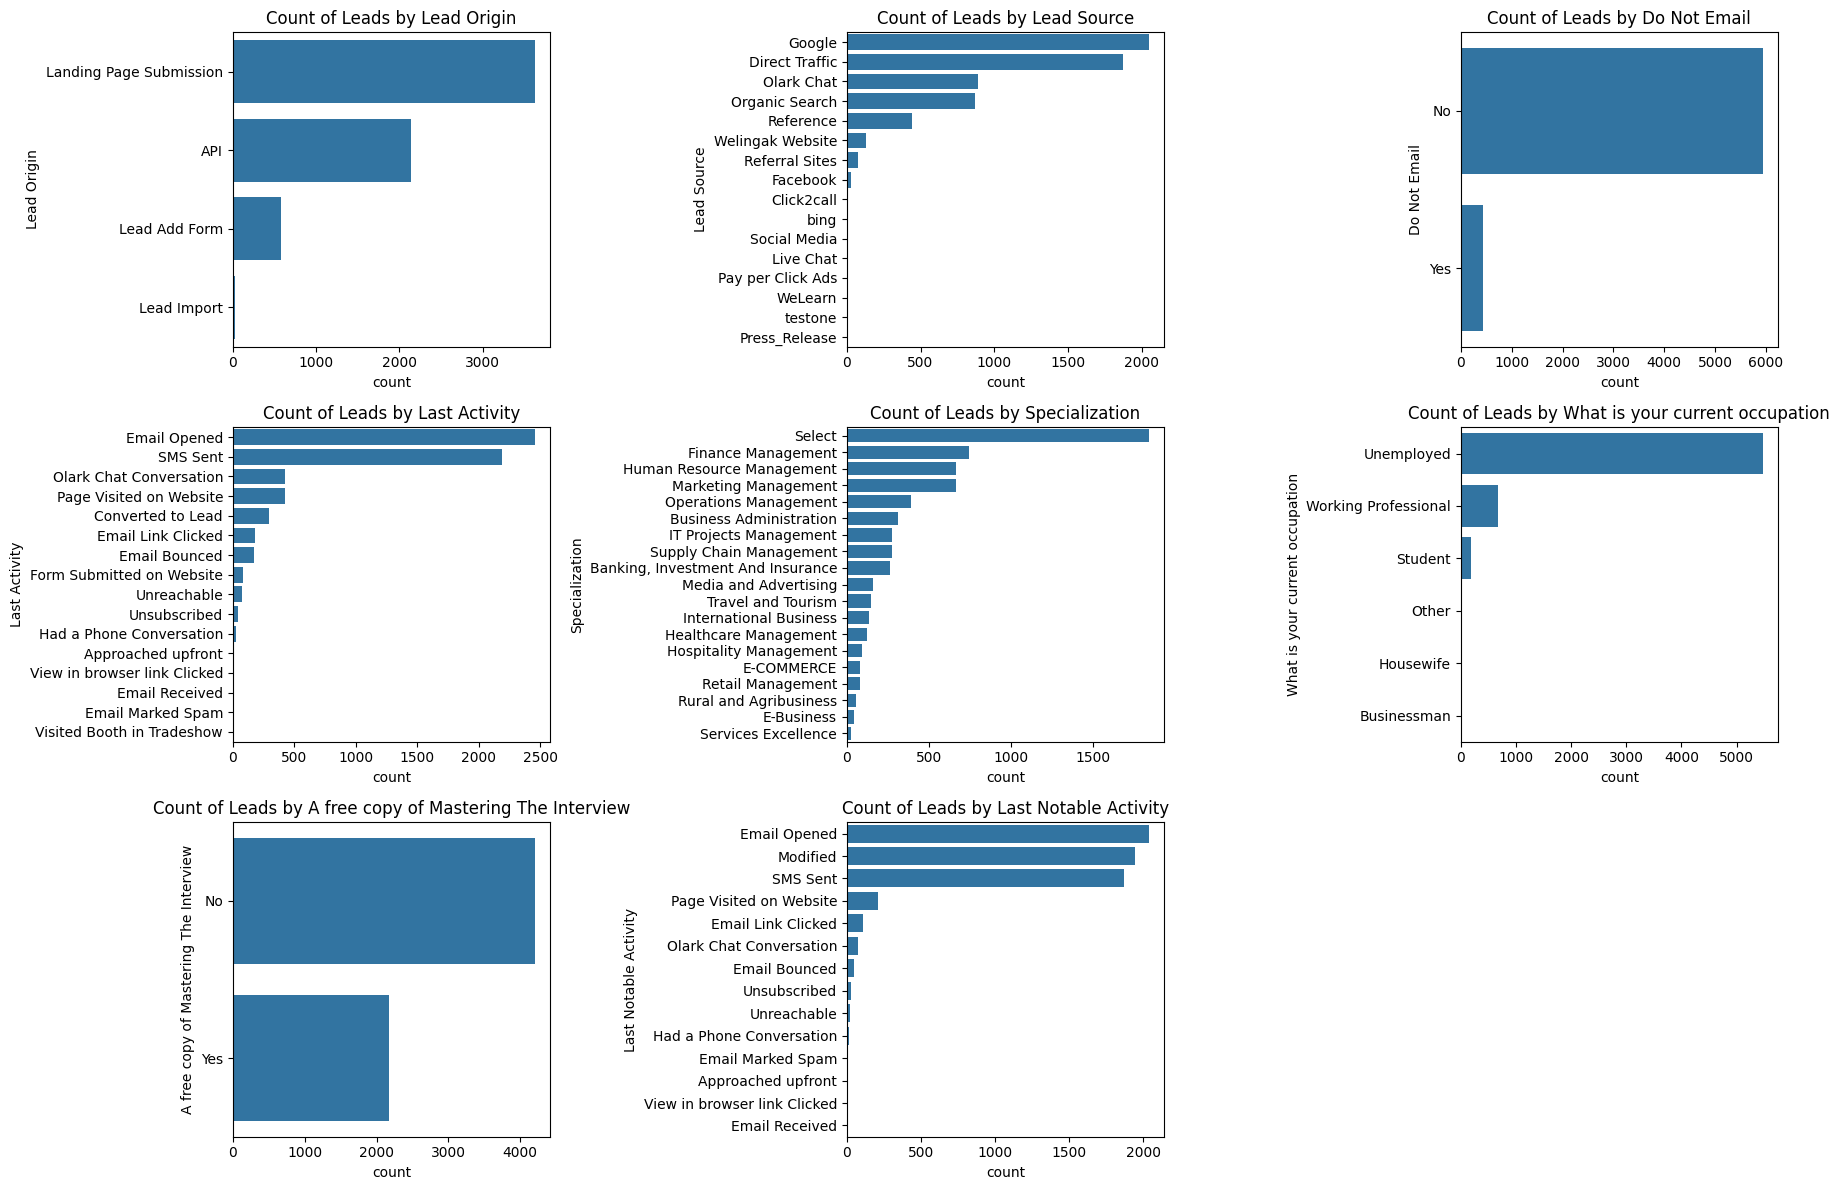

In [221]:
# List of categorical variables
# Categorical Variables
categorical_vars = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                    'Specialization', 'What is your current occupation',
                    'A free copy of Mastering The Interview', 'Last Notable Activity']

# Determine the number of rows and columns for the grid
num_categorical_vars = len(categorical_vars)
num_cols = 3  # Number of columns in the grid
num_rows_categorical = (num_categorical_vars + num_cols - 1) // num_cols  # Calculate rows needed

# Create a figure with subplots for categorical variables
fig, axes = plt.subplots(num_rows_categorical, num_cols, figsize=(18, 4 * num_rows_categorical))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(y=var, data=leads, order=leads[var].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count of Leads by {var}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Numerical Variables

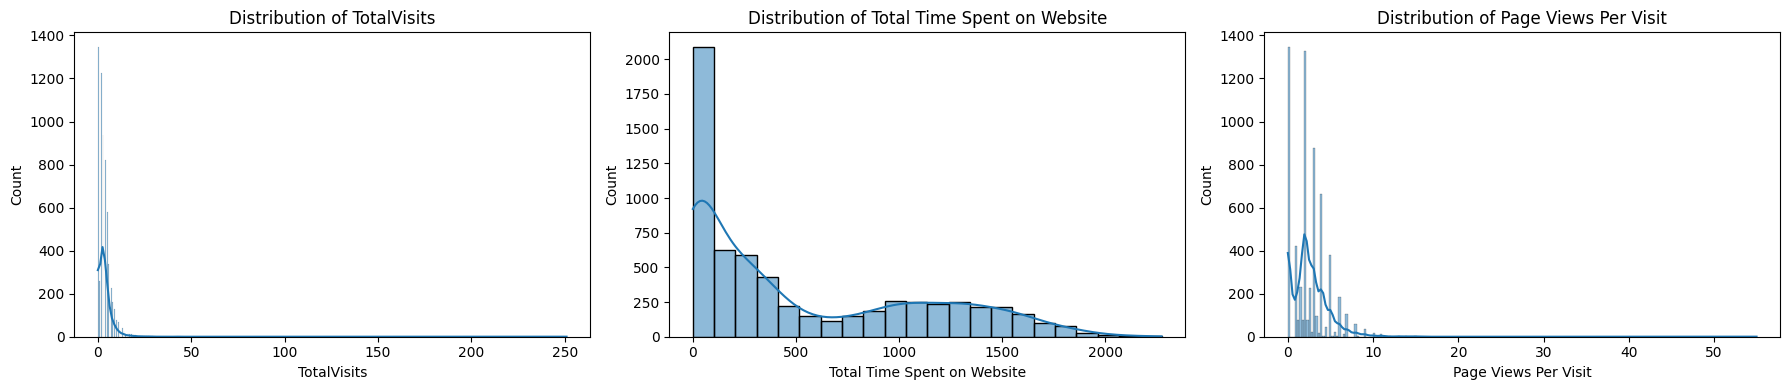

In [222]:
# List of numerical variables
numerical_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Determine the number of rows and columns for the grid
num_numerical_vars = len(numerical_vars)
num_cols = 3  # Number of columns in the grid
num_rows_numerical = (num_numerical_vars + num_cols - 1) // num_cols  # Calculate rows needed

# Create a figure with subplots for numerical variables
fig, axes = plt.subplots(num_rows_numerical, num_cols, figsize=(18, 4 * num_rows_numerical))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical variable
for i, var in enumerate(numerical_vars):
    sns.histplot(leads[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Multivariate Analysis

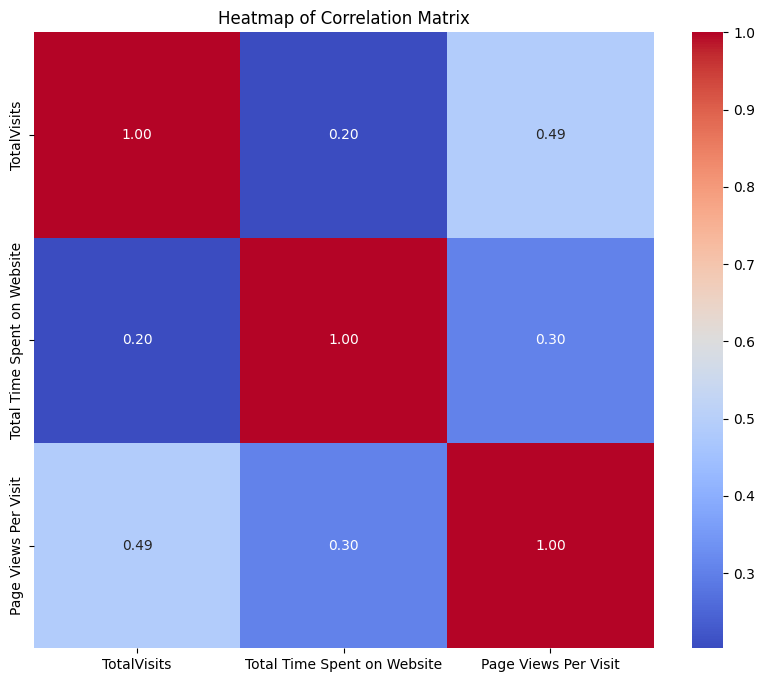

In [223]:
# Correlation Matrix -

# Compute the correlation matrix
correlation_matrix = leads[numerical_vars].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

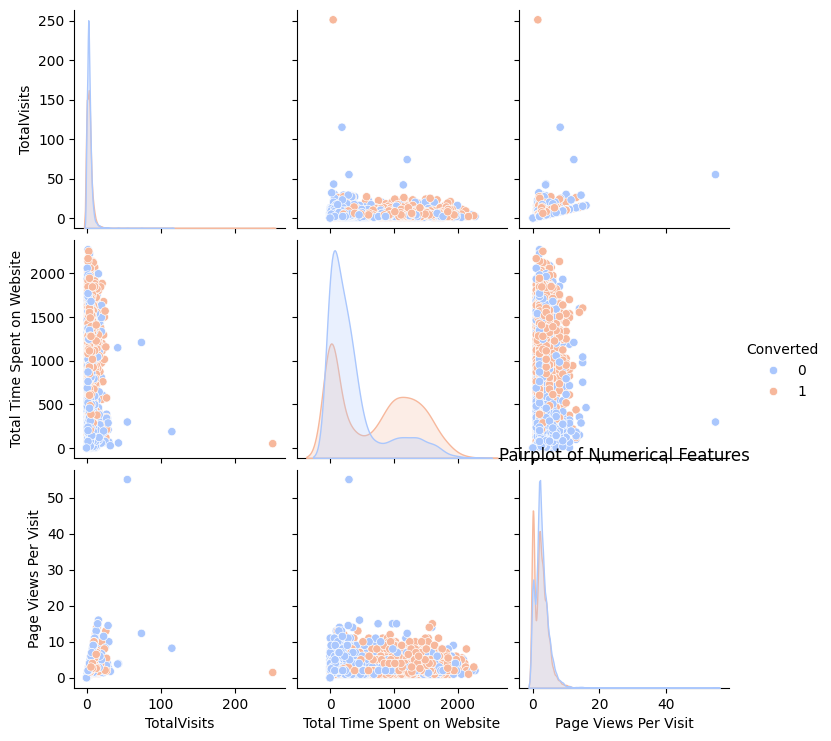

In [224]:
# Select numerical variables for pairplot
numerical_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']

# Create pairplot
sns.pairplot(leads[numerical_vars], hue='Converted', palette='coolwarm')
plt.title('Pairplot of Numerical Features')
plt.show()

### Dummy variable creation


Let's deal with categorical variables through dummy variable creation. Firstly, check what are the categorical variables.

In [225]:
cat_col = leads.select_dtypes(include=['object']).columns
print(cat_col)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [226]:
# Create dummy variables

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True)

# concat the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [227]:
# Create dummy variable for the variable 'Specialization' separately since it has the level 'Select', which is no use so let's drop that

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [228]:
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  Lead Origin_Landing Page Submission  \
0              Modified                                False   
1          Email Opened                                False   
2          Email Opened                                 True   
3              Modified                                 True   
4              Modified                                 True   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                      False                    False   
1                      False                    False   
2                      False                    False   
3                      False                    False   
4                      False                    False   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                       False                 False               False   
1                       False                 False               False   
2                        True                 False               False   
3                        True                 False               False   
4                       False                 False                True   

   Lead Source_Live Chat  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                  False                    True                       False   
1                  False                   False                        True   
2                  False                   False                       False   
3                  False                   False                       False   
4                  False                   False                       False   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                          False                      False   
4                          False                      False   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                  False                       False   
1                  False                       False   
2                  False                       False   
3                  False                       False   
4                  False                       False   

   Lead Source_

In [229]:
# dropping the columns for which dummy variables are created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [230]:
# Replace False and True with 0 and 1

leads.replace({False: 0, True: 1}, inplace=True)

In [231]:
leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2         

### Test-Train Split

In [232]:
# Import the required library

from sklearn.model_selection import train_test_split

In [233]:
# Put all the feature variables except Converted in X

X = leads.drop('Converted', axis=1)

X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_Olark Chat  \
0                   0                      0                       1   
1                   0                      0                       0   
2                   0                      0                       0   
3                   0                      0                       0   
4                   1                      0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
0                             0                 0                    0   
1                             0                 0                    0   
2                             0                 0                    0   
3                             0                 0                    0   
4                             0                 0                    0   

   Do Not Email_Yes  Last Activity_Converted to Lead  \
0                 0                                0   
1                 0                                0   
2                 0                                0   
3                 0                                0   
4                 0                                1   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3       

In [234]:
# Put the target variable (Converted) in y

y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [235]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [236]:
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4771          0.0                            0                   0.0   
6122          7.0                           66                   7.0   
9202          4.0                          947                   4.0   
6570          3.0                          861                   3.0   
2668          8.0                          898                   4.0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4771                                    0                          1   
6122                                    1                          0   
9202                                    1                          0   
6570                                    1                          0   
2668                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
4771                        0                           0   
6122                        0                           1   
9202                        0                           0   
6570                        0                           1   
2668                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
4771                     0                   0                      0   
6122                     0                   0                      0   
9202                     0                   1                      0   
6570                     0                   0                      0   
2668                     0                   0                      0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
4771                       0                           0   
6122                       0                           0   
9202                       0                           0   
6570                       0                           0   
2668                       0                           1   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
4771                              0                          0   
6122                              0                          0   
9202                              0                          0   
6570                              0                          0   
2668                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
4771                      1                           0   
6122                      0                           0   
9202                      0                           0   
6570                      0                           0   
2668                      0                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
4771                         0                    0   
6122                         0                    0   
9202                         0                    0   
6570                         0                    0   
2668                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
4771                             0                 0                    0   
6122                             0                 0                    0   
9202                             0                 0                    0   
6570                             0                 0                    0   
2668                             0                 0                    0   

      Do Not Email_Yes  Last Activity_Converted to Lead  \
4771                 0                                0   
6122                 0                                0   
9202                 0                                0   
6570                 1                                0   
2668                 0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
4

In [237]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [238]:
scaler = MinMaxScaler()

In [239]:
# Let's scale the TotalVisits , Total Time Spent on Website  and Page Views Per Visit to bring them to same scale

scale_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

X_train[scale_vars]= scaler.fit_transform(X_train[scale_vars])


In [240]:
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003     0.015936                     0.029489                 0.125   
218      0.015936                     0.082306                 0.250   
4171     0.023904                     0.034331                 0.375   
4037     0.000000                     0.000000                 0.000   
3660     0.000000                     0.000000                 0.000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8003                        0                           1   
218                         0                           1   
4171                        0                           1   
4037                        0                           0   
3660                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
8003                     0                   0                      0   
218                      0                   0                      0   
4171                     0                   0                      0   
4037                     0                   0                      0   
3660                     0                   0                      0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
8003                       0                           0   
218                        0                           0   
4171                       0                           0   
4037                       1                           0   
3660                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
8003                              0                          0   
218                               0                          0   
4171                              0                          0   
4037                              0                          0   
3660                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
8003                      0                           0   
218                       0                           0   
4171                      0                           0   
4037                      0                           0   
3660                      1                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
8003                         0                    0   
218                          0                    0   
4171                         0                    0   
4037                         0                    0   
3660                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_testone  \
8003                             0                 0                    0   
218                              0                 0                    0   
4171                             0                 0                    0   
4037                             0                 0                    0   
3660                             0                 0                    0   

      Do Not Email_Yes  Last Activity_Converted to Lead  \
8003                 0                                0   
218                  0                                0   
4171                 0                                0   
4037                 0                                0   
3660                 0                                0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
8

## Looking at the correlations

 As the number of variables are pretty high, so instead of heatmap let's check through table

In [241]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#correlation matrix
corr_matrix = leads.corr()
print(corr_matrix)


                                                    Converted  TotalVisits  \
Converted                                            1.000000     0.005651   
TotalVisits                                          0.005651     1.000000   
Total Time Spent on Website                          0.313338     0.202551   
Page Views Per Visit                                -0.063362     0.489039   
Lead Origin_Landing Page Submission                 -0.117563     0.267954   
Lead Origin_Lead Add Form                            0.288666    -0.208375   
Lead Origin_Lead Import                             -0.019269    -0.043000   
Lead Source_Direct Traffic                          -0.133600     0.075252   
Lead Source_Facebook                                -0.021207    -0.042052   
Lead Source_Google                                   0.020205     0.085306   
Lead Source_Live Chat                                0.018407    -0.012720   
Lead Source_Olark Chat                              -0.044348   

## Model Building


In [242]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object
logreg = LogisticRegression()

In [243]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=logreg, n_features_to_select=15)   # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [244]:
#check features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [245]:
# Set RFE selected columns in 'col' variable

col = X_train.columns[rfe.support_]

In [246]:
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [247]:
# Select RFE columns

X_train = X_train[col]

## Assessing the model with StatsModels

In [248]:
# Import statsmodels

import statsmodels.api as sm

In [249]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 23 Jul 2024   Deviance:                       4145.5
Time:                        12:07:29   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

In [250]:
# Check feature variables VIF values

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [251]:
#create VIF dataframe

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                           Lead Origin_Lead Add Form  84.19
4                               Lead Source_Reference  65.18
5                        Lead Source_Welingak Website  20.03
11         What is your current occupation_Unemployed   3.65
7              Last Activity_Had a Phone Conversation   2.44
13     Last Notable Activity_Had a Phone Conversation   2.43
1                         Total Time Spent on Website   2.38
0                                         TotalVisits   1.62
8                              Last Activity_SMS Sent   1.59
12  What is your current occupation_Working Profes...   1.56
3                              Lead Source_Olark Chat   1.44
6                                    Do Not Email_Yes   1.09
10            What is your current occupation_Student   1.09
9           What is your current occupation_Housewife   1.01
14                  Last Notable Activity_Unreachable   1.01

P and VIF values of only few variables is high

Let's drop the high P value and high VIF value first which is `Lead Source_Reference`

In [252]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [253]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Tue, 23 Jul 2024   Deviance:                       4146.5
Time:                        12:07:29   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [254]:
#create VIF dataframe

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_Unemployed  3.65
6              Last Activity_Had a Phone Conversation  2.44
12     Last Notable Activity_Had a Phone Conversation  2.43
1                         Total Time Spent on Website  2.38
2                           Lead Origin_Lead Add Form  1.71
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
9             What is your current occupation_Student  1.09
8           What is your current occupation_Housewife  1.01
13                  Last Notable Activity_Unreachable  1.01

VIF is under 5, let's drop now the highest p value feature `Last Notable Activity_Had a Phone Conversation`.

In [255]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [256]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Tue, 23 Jul 2024   Deviance:                       4152.2
Time:                        12:07:30   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

In [257]:
#create VIF dataframe

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_Unemployed  3.65
1                         Total Time Spent on Website  2.38
2                           Lead Origin_Lead Add Form  1.71
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
9             What is your current occupation_Student  1.09
6              Last Activity_Had a Phone Conversation  1.01
8           What is your current occupation_Housewife  1.01
12                  Last Notable Activity_Unreachable  1.01

Drop `What is your current occupation_Housewife`.

In [258]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [259]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Tue, 23 Jul 2024   Deviance:                       4156.7
Time:                        12:07:30   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

In [260]:
#create VIF dataframe

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9          What is your current occupation_Unemployed  3.64
1                         Total Time Spent on Website  2.37
2                           Lead Origin_Lead Add Form  1.70
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
10  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
8             What is your current occupation_Student  1.09
6              Last Activity_Had a Phone Conversation  1.01
11                  Last Notable Activity_Unreachable  1.01

Drop `What is your current occupation_Working Professional`.

In [261]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [262]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Tue, 23 Jul 2024   Deviance:                       4158.1
Time:                        12:07:30   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [263]:
#create VIF dataframe

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   What is your current occupation_Unemployed  2.82
1                  Total Time Spent on Website  2.00
0                                  TotalVisits  1.54
7                       Last Activity_SMS Sent  1.51
2                    Lead Origin_Lead Add Form  1.45
3                       Lead Source_Olark Chat  1.33
4                 Lead Source_Welingak Website  1.30
5                             Do Not Email_Yes  1.08
8      What is your current occupation_Student  1.06
6       Last Activity_Had a Phone Conversation  1.01
10           Last Notable Activity_Unreachable  1.01

Now it is good to proceed, the features now have P and VIF values less than 0.05 and 5 respectively

##  Model Evaluation

In [264]:
# predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]


8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [265]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [266]:
# Create a new dataframe consists the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.300117
1          0         0.142002
2          1         0.127629
3          1         0.291558
4          1         0.954795

### Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0

In [267]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the head now
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.300117          0
1          0         0.142002          0
2          1         0.127629          0
3          1         0.291558          0
4          1         0.954795          1

Now have to evaluate the model as we have the probabilities and conversion predictions

In [268]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [269]:
# Create the Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [270]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7886124187401928


In [271]:
# check the other metrics as well

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [272]:
# Calculate the sensitivity

TP/(TP+FN)

0.739413680781759

In [273]:
# Calculate the specificity

TN/(TN+FP)

0.8343425605536332

### Finding the Optimal Cutoff

Now, using 0.5 as a threshold was somewhat personal whim to loosely assess the model's performance. However, in order to achieve better results, it's crucial to optimize the threshold. Let's start by plotting an ROC curve to determine the AUC we obtain

In [274]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [275]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [276]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

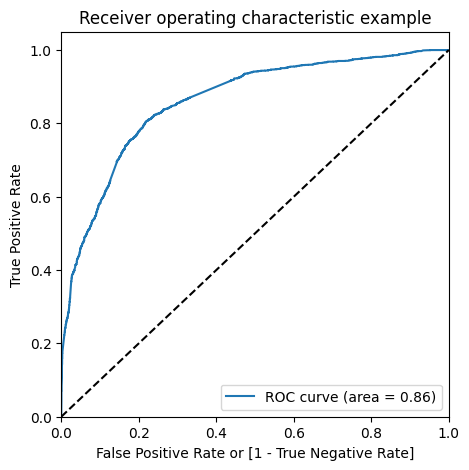

In [277]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The ROC curve area is 0.86, indicating a strong model performance. Next, we'll analyze the sensitivity and specificity tradeoff to determine the optimal cutoff point.

In [278]:
# create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [279]:
# create a dataframe to check the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


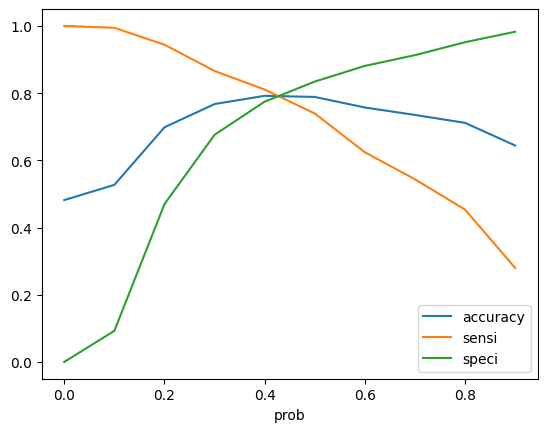

In [280]:
# plot the values

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Based on the data, it's clear that the optimal values for the three metrics are around 0.42. We should set `0.42` as our cutoff point now.

In [281]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [282]:
# check the accuracy again

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908540685944856

In [283]:
# create the confusion matrix again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]])

In [284]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [285]:
# Compute Sensitivity

TP/(TP+FN)

0.793392275476966

In [286]:
# Compute Specificity

TN/(TN+FP)

0.7884948096885813

The cut off seems better now, let's proceed with further steps

## Make Predictions on the Test Set

In [287]:
# Scale the test set

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [288]:
# Select the X_train columns for X_test as well

X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4771     0.000000                     0.000000                          1   
6122     0.027888                     0.029049                          0   
9202     0.015936                     0.416813                          0   
6570     0.011952                     0.378961                          0   
2668     0.031873                     0.395246                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What is your current occupation_Working Professional  \
4771                                                  1      
6122                                                  0      
9202                                                  0      
6570                                                  0      
2668                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      Last Notable Activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [289]:
# Add a constant and check X_test

X_test_sm = sm.add_constant(X_test[col])
X_test_sm

const  TotalVisits  Total Time Spent on Website  \
4771    1.0     0.000000                     0.000000   
6122    1.0     0.027888                     0.029049   
9202    1.0     0.015936                     0.416813   
6570    1.0     0.011952                     0.378961   
2668    1.0     0.031873                     0.395246   
4233    1.0     0.000000                     0.000000   
3368    1.0     0.007968                     0.705106   
9091    1.0     0.035857                     0.406690   
5972    1.0     0.007968                     0.030810   
3631    1.0     0.019920                     0.505722   
6884    1.0     0.000000                     0.000000   
4362    1.0     0.007968                     0.102113   
7718    1.0     0.023904                     0.140845   
3715    1.0     0.015936                     0.464349   
4198    1.0     0.011952                     0.367518   
7790    1.0     0.003984                     0.183979   
2424    1.0     0.015936                     0.345951   
1899    1.0     0.023904                     0.805458   
8209    1.0     0.007968                     0.066461   
182     1.0     0.015936                     0.397887   
2010    1.0     0.027888                     0.381162   
731     1.0     0.007968                     0.149648   
1872    1.0     0.000000                     0.000000   
8987    1.0     0.011952                     0.574824   
3083    1.0     0.011952                     0.292254   
8205    1.0     0.000000                     0.000000   
5370    1.0     0.007968                     0.075264   
7386    1.0     0.000000                     0.000000   
1925    1.0     0.019920                     0.381162   
1965    1.0     0.000000                     0.000000   
1552    1.0     0.007968                     0.628961   
8442    1.0     0.000000                     0.000000   
7766    1.0     0.019920                     0.025968   
2798    1.0     0.000000                     0.000000   
999     1.0     0.023904                     0.812940   
8114    1.0     0.019920                     0.615757   
3193    1.0     0.039841                     0.095070   
2914    1.0     0.007968                     0.492518   
8174    1.0     0.000000                     0.000000   
1991    1.0     0.039841                     0.655370   
8497    1.0     0.007968                     0.092430   
6989    1.0     0.035857                     0.410211   
6175    1.0     0.015936                     0.828345   
5710    1.0     0.011952                     0.062500   
9162    1.0     0.027888                     0.667254   
5652    1.0     0.000000                     0.000000   
6948    1.0     0.003984                     0.031250   
1311    1.0     0.007968                     0.512764   
5998    1.0     0.043825                     0.314261   
2050    1.0     0.035857                     0.168134   
6144    1.0     0.015936                     0.401849   
9142    1.0     0.011952                     0.101673   
8567    1.0     0.000000                     0.000000   
7048    1.0     0.035857                     0.542694   
6459    1.0     0.011952                     0.106954   
288     1.0     0.015936                     0.013644   
8864    1.0     0.011952                     0.122359   
3814    1.0     0.011952                     0.595511   
8641    1.0     0.000000                     0.000000   
5814    1.0     0.007968                     0.096391   
4551    1.0     0.019920                     0.536972   
1886    1.0     0.011952                     0.466989   
1644    1.0     0.000000                     0.000000   
2131    1.0     0.000000                     0.000000   
6942    1.0     0.000000                     0.000000   
6655    1.0     0.019920                     0.073063   
6545    1.0     0.043825                     0.001320   
1602    1.0     0.015936                     0.001761   
3579    1.0     0.015936                     0.061620   
889     1.0     

In [290]:
# Drop the required columns from X_test like the columns dropped in X_train

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife','What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], axis=1, inplace=True)

In [291]:
# predict on the test set

y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [292]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [293]:
# Check the head

y_pred_1.head()

0
4771  0.996296
6122  0.129992
9202  0.703937
6570  0.299564
2668  0.720796

In [294]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [295]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [296]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [297]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.996296
1          0  0.129992
2          0  0.703937
3          1  0.299564
4          1  0.720796

In [298]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [299]:
# Now check the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996296
1          0         0.129992
2          0         0.703937
3          1         0.299564
4          1         0.720796

In [300]:
# Predict on the test set using 0.42 cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [301]:
# Now check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996296                1
1          0         0.129992                0
2          0         0.703937                1
3          1         0.299564                0
4          1         0.720796                1

In [302]:
# check the overall accuracy again

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7845188284518828

In [303]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[786, 210],
       [202, 714]])

In [304]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [305]:
# Compute sensitivity

TP / float(TP+FN)

0.7794759825327511

In [306]:
# Compute specificity

TN / float(TN+FP)

0.7891566265060241

## Precision-Recall View

In [307]:
#check the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]])

##### Precision
TP / TP + FP

In [308]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8057809330628803

##### Recall
TP / TP + FN

In [309]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.739413680781759

### Precision and recall tradeoff

In [310]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      0
 12      1
 13      1
 14      0
 15      1
 16      1
 17      1
 18      1
 19      1
 20      0
 21      0
 22      1
 23      0
 24      0
 25      0
 26      1
 27      0
 28      1
 29      0
 30      0
 31      0
 32      0
 33      0
 34      0
 35      1
 36      0
 37      0
 38      0
 39      1
 40      0
 41      1
 42      0
 43      0
 44      1
 45      0
 46      0
 47      1
 48      0
 49      1
 50      0
 51      0
 52      1
 53      1
 54      1
 55      0
 56      0
 57      0
 58      0
 59      0
 60      0
 61      0
 62      1
 63      0
 64      1
 65      0
 66      0
 67      0
 68      0
 69      0
 70      1
 71      1
 72      1
 73      0
 74      1
 75      0
 76      0
 77      0
 78      1
 79      1
 80      0
 81      0
 82      1
 83      0
 84      1
 85      1
 86      1
 87      1
 88      1
 89      1
 90      0

In [311]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

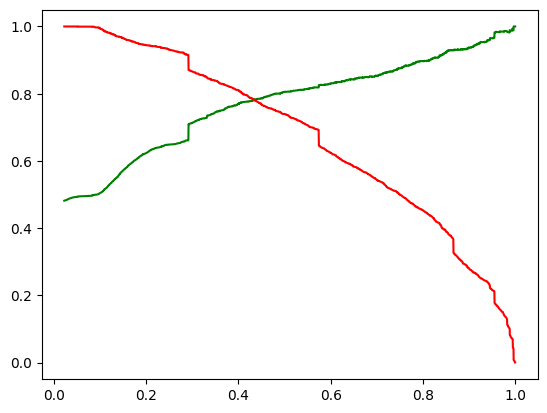

In [312]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [313]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [314]:
# check the accuracy again

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908540685944856

In [315]:
# create the confusion matrix again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]])

In [316]:
# Evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Precision

In [317]:
TP/(TP+FP)

0.7771194165907019

### Recall

In [318]:
TP/(TP+FN)

0.793392275476966

This cutoff point looks just right.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. And our model have achieved approximately 80% recall. So this model will fit the business need.